In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = pd.read_csv('hepatites.csv',names = ('Class','AGE','SEX','STEROID','ANTIVIRUS','FATIGUE','MALAISE','ANOREXIA','LIVERBIG',\
                                         'LIVERFIRM','SPLEENPALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALKPHOSPHATE',\
                                        'SGOT','ALBUMIN','PROTIME','HISTOLOGY'))
d.head()

,Class,AGE,SEX,STEROID,ANTIVIRUS,FATIGUE,MALAISE,ANOREXIA,LIVERBIG,LIVERFIRM,SPLEENPALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALKPHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


1. Class: DIE, LIVE 
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80 
3. SEX: male, female 
4. STEROID: no, yes 
5. ANTIVIRALS: no, yes 
6. FATIGUE: no, yes 
7. MALAISE: no, yes 
8. ANOREXIA: no, yes 
9. LIVER BIG: no, yes 
10. LIVER FIRM: no, yes 
11. SPLEEN PALPABLE: no, yes 
12. SPIDERS: no, yes 
13. ASCITES: no, yes 
14. VARICES: no, yes 
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250 
17. SGOT: 13, 100, 200, 300, 400, 500, 
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0 
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90 
20. HISTOLOGY: no, yes 

In [3]:
s = d.replace("?", 0 )
s.head()

,Class,AGE,SEX,STEROID,ANTIVIRUS,FATIGUE,MALAISE,ANOREXIA,LIVERBIG,LIVERFIRM,SPLEENPALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALKPHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [4]:
s.describe()

,Class,AGE,SEX,ANTIVIRUS,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
X = s.drop(['Class',], axis=1)
y = s['Class']

In [7]:
from sklearn.cross_validation import train_test_split

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 2)

In [9]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train) 

pred = neigh.predict(X_test)
pred_pro = neigh.predict_proba(X_test)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
acuuracy = accuracy_score(y_test, pred)
acuuracy

0.8602150537634409

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


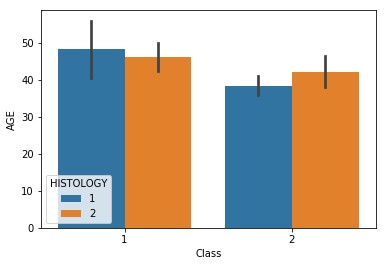

In [13]:
sns.barplot(x = 'Class', y = 'AGE', hue='HISTOLOGY', data = s)

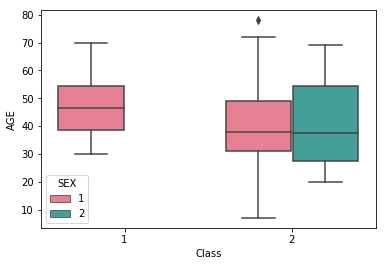

In [14]:
sns.boxplot(x = 'Class', y = 'AGE', hue='SEX', data = s, palette = 'husl')

In [15]:
from sklearn.metrics import classification_report, confusion_matrix 
print("misclassified samples:-", (y_test != pred).sum())
print( confusion_matrix(y_test, pred)) 
print("______________________________________________________")
print(classification_report(y_test, pred))  


misclassified samples:- 13
[[ 9 12]
 [ 1 71]]
______________________________________________________
             precision    recall  f1-score   support

          1       0.90      0.43      0.58        21
          2       0.86      0.99      0.92        72

avg / total       0.87      0.86      0.84        93



In [16]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

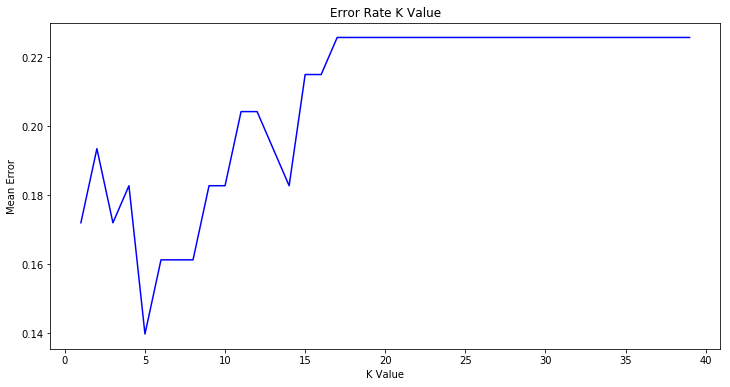

In [17]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='b')
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  